In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle
import json


In [26]:
df = pd.read_csv('/Users/parkinhyuk/Desktop/TUM/Python for Engineering Data Analysis - From Machine Learning to Visualization/Regression KRR /Regression KRR/wave.csv')
df.x.head()

0    2.470824
1    5.525175
2   -8.739580
3   -8.846282
4   -1.910637
Name: x, dtype: float64

In [ ]:
### Split data

In [120]:
def get_train_test_split(filename: str) -> dict:
    
    # Split the data into training and testing sets with 20% of the data as test
    x_tv, x_test, y_tv, y_test = train_test_split(df.x , df.y, shuffle=True, test_size=0.2)
    
    # Construct the dictionary to return
    split_data = {
        "train": {
            "x": x_tv.values.reshape(-1,1),
            "y": y_tv.values
        },
        "test": {
            "x": x_test.values.reshape(-1,1),
            "y": y_test.values
        }
    }
    
    return split_data

In [121]:
def wave(x: np.ndarray) -> np.ndarray:
    return np.exp(-(x)**2)

In [144]:
def get_hyper_model() -> GridSearchCV:
    
    parameters = {
        'alpha': [0.1,1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': np.logspace(-4, 1, 6)  # Wide range of gamma values
    }
    
    model = KernelRidge()
    
    hypermodel = GridSearchCV(model,parameters,cv=8,scoring='neg_mean_squared_error')

    
    return hypermodel

In [153]:
def train(hyper_model: GridSearchCV, data: dict,name:str) -> KernelRidge:
    
    dt = get_train_test_split(data)
    
    x_tv = dt['train']['x']
    y_tv = dt['train']['y']
    
    x_test = dt['test']['x']
    y_test = dt['test']['y']
    
    #fit model using training data
    hyper_model.fit(x_tv, y_tv)
    
    #Find the best esitmate
    best_model = hyper_model.best_estimator_ 
    
    y_pred_train = best_model.predict(x_tv.reshape(-1,1))
    y_pred_test = best_model.predict(x_test.reshape(-1,1))
    
    
    mae_train = mean_absolute_error(y_tv, y_pred_train)
    mse_train = mean_squared_error(y_tv, y_pred_train)
    r2_train = r2_score(y_tv, y_pred_train)
    
    mae_test = mean_absolute_error(y_test,y_pred_test)
    mse_test = mean_squared_error(y_test,y_pred_test)
    
    r2_test  = r2_score(y_test,y_pred_test)
    

    result = {
        "best_params": {
            "alpha": hyper_model.best_estimator_.alpha,
            "gamma": hyper_model.best_estimator_.gamma,
            "kernel": "rbf"
            
        },
        "train": {
            "mae": mae_train,
            "mse": mse_train,
            "r2":  r2_train
        },
        
        "test": {
            "mae": mae_test,
            "mse": mse_test,
            "r2":  r2_test
        }
    }
    
    with open(f"{name}.json",'w') as file:
        json.dump(result, file, indent=2)
        
    with open(f"{name}.pickl",'wb') as file:
        pickle.dump(hyper_model.best_estimator_, file )
    
    return result, hyper_model.best_estimator_


In [155]:
if __name__ == "__main__":
    data = get_train_test_split("wave.csv")

    hyper_model = get_hyper_model()

    best_model = train(hyper_model, data, "ex13")
    print(best_model)
 #   fig = plot(best_model, data, "ex13")

#    plt.show()

({'best_params': {'alpha': 0.1, 'gamma': 10.0, 'kernel': 'rbf'}, 'train': {'mae': 0.022794415455573463, 'mse': 0.0009718689964861815, 'r2': 0.9934415886646183}, 'test': {'mae': 0.10861515971835844, 'mse': 0.03840215054853109, 'r2': 0.6209256260991662}}, KernelRidge(alpha=0.1, gamma=10.0, kernel='rbf'))


{'best_params': {'alpha': 0.01, 'gamma': 10.0, 'kernel': 'rbf'}, 'train': {'mae': 0.007892711722503769, 'mse': 0.00014214922541272497, 'r2': 0.999000258338663}, 'test': {'mae': 0.10936917462546422, 'mse': 0.03678281469930416, 'r2': 0.7332485759779807}}


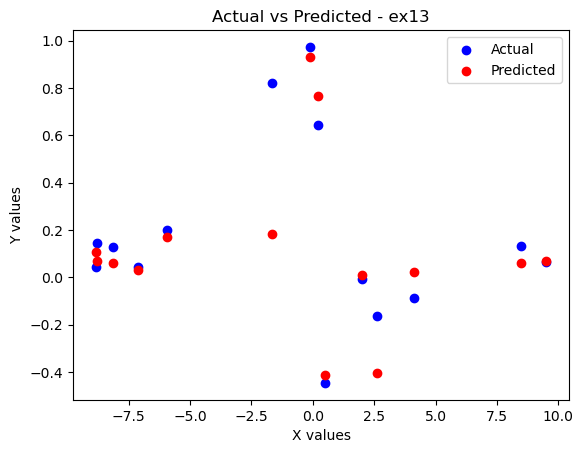

In [112]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
import json

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def wave(x: np.ndarray) -> np.ndarray:
    return np.exp(-(x)**2)


def get_train_test_split(filename: str) -> dict:
    # Load data from CSV file
    df = pd.read_csv(filename)
    
    # Split the data into training and testing sets with 20% of the data as test
    x_tv, x_test, y_tv, y_test = train_test_split(df[['x']], df['y'], shuffle=True, test_size=0.2)
    
    # Construct the dictionary to return
    split_data = {
        "train": {
            "x": x_tv.values,
            "y": y_tv.values
        },
        "test": {
            "x": x_test.values,
            "y": y_test.values
        }
    }
    
    return split_data


def get_hyper_model() -> GridSearchCV:
    parameters = {
        'alpha': [0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': np.logspace(-4, 1, 6)  # Wide range of gamma values
    }
    
    model = KernelRidge()
    hypermodel = GridSearchCV(model, parameters, cv=8, scoring='neg_mean_squared_error')
    
    return hypermodel


def train(hyper_model: GridSearchCV, data: dict, name: str) -> KernelRidge:
    x_tv = data['train']['x']
    y_tv = data['train']['y']
    
    x_test = data['test']['x']
    y_test = data['test']['y']
    
    # Fit model using training data
    hyper_model.fit(x_tv, y_tv)
    
    # Find the best estimator
    best_model = hyper_model.best_estimator_
    
    # Make predictions on training and test sets
    y_pred_train = best_model.predict(x_tv)
    y_pred_test = best_model.predict(x_test)
    
    # Calculate metrics on training set
    mae_train = mean_absolute_error(y_tv, y_pred_train)
    mse_train = mean_squared_error(y_tv, y_pred_train)
    r2_train = r2_score(y_tv, y_pred_train)
    
    # Calculate metrics on test set
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    result = {
        "best_params": hyper_model.best_params_,
        "train": {
            "mae": mae_train,
            "mse": mse_train,
            "r2": r2_train
        },
        "test": {
            "mae": mae_test,
            "mse": mse_test,
            "r2": r2_test
        }
    }
    
    with open(f"{name}.json", 'w') as file:
        json.dump(result, file, indent=2)
        
    with open(f"{name}.pkl", 'wb') as file:
        pickle.dump(best_model, file)
    
    return result, best_model


def plot(model: KernelRidge, data: dict, name: str) -> mpl.figure.Figure:
    fig = plt.figure()
    
    # Generate predictions for plotting
    x_test = data['test']['x']
    y_test = data['test']['y']
    y_pred = model.predict(x_test)
    
    # Plot actual vs predicted values
    plt.scatter(x_test, y_test, color='blue', label='Actual')
    plt.scatter(x_test, y_pred, color='red', label='Predicted')
    plt.legend()
    plt.title(f"Actual vs Predicted - {name}")
    plt.xlabel("X values")
    plt.ylabel("Y values")
    
    return fig


if __name__ == "__main__":
    data = get_train_test_split("wave.csv")

    hyper_model = get_hyper_model()

    result, best_model = train(hyper_model, data, "ex13")
    print(result)

    fig = plot(best_model, data, "ex13")

    plt.show()